In [3]:
#Imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Load and visualize train_data

In [4]:
df= pd.read_csv("/content/Mall_Customers.xls")

In [5]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


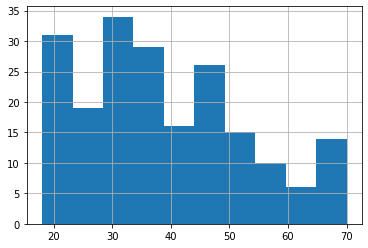

In [6]:
df['Age'].hist()

In [7]:
female_spendings = df.loc[df['Genre'] == 'Female']['Spending_Score'].mean()
male_spendings   = df.loc[df['Genre'] == 'Male']['Spending_Score'].mean()
print(female_spendings ,'  ', male_spendings)

51.526785714285715    48.51136363636363


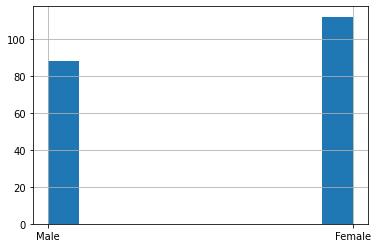

In [8]:
df['Genre'].hist()

# train_data pre processing 

In [9]:
df.index = df['CustomerID']
df.drop('CustomerID',axis=1, inplace= True)
df_history = df.copy()

In [10]:
# normalizatin values from 0 -> 1
df['Age'] = ( (df['Age']- df['Age'].min() ) /df['Age'].max())
df['Annual_Income_(k$)'] = ( (df['Annual_Income_(k$)']- df['Annual_Income_(k$)'].min() ) /df['Annual_Income_(k$)'].max())
df['Spending_Score'] = ( (df['Spending_Score']- df['Spending_Score'].min() ) /df['Spending_Score'].max())


In [11]:
#binarization for male => 0 and female => 1
df["Genre"]=df["Genre"].map({"Female":1 , "Male": 0})

In [12]:
train_data = df.values #turns train_data frame into array

In [13]:
np.random.shuffle(train_data)

# K-means algorithem

In [14]:
def Kmeans(k,train_data):
  centroids      =  np.random.uniform(low=0, high=1, size=(k,4))#initilize centeroids
  centroids[:,0] = np.random.randint(2, size=k) # for genre centroids  
  distance     = np.zeros((1,k)) #values of distance between
  group = [[] for i in range (k) ] # k number of groups 

  train_data_len = len(train_data)
  # Genre	Age	Annual_Income_(k$)	Spending_Score
  #  0     1         2                 3
  
  while True :
    for i in range (train_data_len):
      for j in range (k): 
        distance [0,j] = np.sqrt(sum( [(train_data[i][l]- centroids[j][l])**2  for l in range(4) ] ))#calculating distanse loops over 4 indexes

      min_index = np.argmin(distance) #index of min value that train_data point will be appended to
      group[min_index].append(train_data[i])
    centroids_fb = centroids #last value of centroids for loop breaking 
    #update centroid to the mean value of each group
    for i in range (k):
      if (len(group[i])!=0) :
        mean_value =  np.sum(np.array(group[i]), axis=0) / len(group[i])
        centroids[i] = mean_value
    
    if centroids_fb.all() == centroids.all() :break
  return group , centroids


In [15]:
groups,stroids = Kmeans(5,train_data)

In [16]:
stroids

array([[0.        , 0.47460317, 0.5458232 , 0.23232323],
       [0.        , 0.35882353, 0.40103049, 0.71182412],
       [0.        , 0.2431746 , 0.26196269, 0.35420875],
       [1.        , 0.26943164, 0.31057217, 0.58466384],
       [1.        , 0.37368421, 0.38378794, 0.14673046]])

# visualize results

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


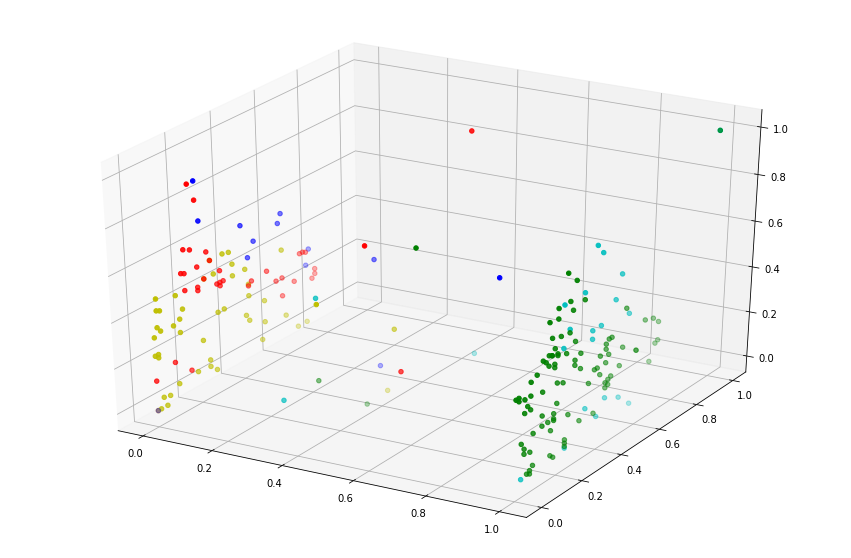

In [17]:
#Flatten the points:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

colors = ['b','r','y','g','c']

for i in range(len (groups)):
  #dimentions
  xs = np.array([i[0] for i in groups[i]])
  ys = np.array([i[1] for i in groups[i]])
  zs = np.array([i[2] for i in groups[i]])
  ls = np.array([i[3] for i in groups[i]])

  ax.scatter3D(xs, ys, zs,ls,color=colors[i])
  ax.scatter3D(groups[i][0],groups[i][1],groups[i][2],groups[i][3],color=colors[i])

# predicting spending score

In [18]:
#test data preprociccing 
td_age_min = df_history['Age'].min()
td_age_max = df_history['Age'].max()
td_Annual_Income_min = df_history['Annual_Income_(k$)'].min()
td_Annual_Income_max = df_history['Annual_Income_(k$)'].max()
td_Spending_Score_min = df_history['Spending_Score'].min()
td_Spending_Score_max = df_history['Spending_Score'].max()


def TestDatPre(data):
  data[1] = ( (data[1]- td_age_min ) /td_age_max)
  data[2] = ( (data[2]- td_Annual_Income_min ) /td_Annual_Income_max)
  return data

def denormalize(value,min,max):
  return (value*max)+min


In [33]:
arr = np.array([1,40,50],dtype=np.float16) # For an array, we have to specify the datatype
arr = TestDatPre(arr)
arr = np.reshape(arr, [1,3])
arg_spending_centroid = stroids[:,3] #To get the last column which is the spending score 
arg_spending_centroid = [denormalize(i,td_Spending_Score_min,td_Spending_Score_max) for i in arg_spending_centroid] # Denormalize spending scores

In [34]:
print('Test dataset: ',arr)
print('Spending scores denormalized: ', arg_spending_centroid)

Test dataset:  [[1.     0.3142 0.2554]]
Spending scores denormalized:  [24.0, 71.47058823529412, 36.06666666666666, 58.881720430107514, 15.526315789473685]


In [44]:
# Simple algorithm that takes test_data and do the following
# 1- loop over each test data point 
# 2- Calculate the distance between the data point and each centroid 
# 3- the minimum distance gives us the group to which the data point belongs 
# 4- Once we know the group, we can know the spending score 
# 5- Bingo 

def PredictSpendingScore (test_data,stroids,arg_spending_centroid):
  distance= np.zeros((1,4))
  data_avg_spendings=[]
  stroids =stroids[:,0:3] #to match the data as have no spendings col
  for i in range(len(test_data)):    
    distance =np.sqrt( sum( [ ((test_data[i][l] - stroids[l])**2) for l in range(3) ] ) )
    min_index = np.argmin(distance) #index of min value that shows the group which point belong to
    data_avg_spendings.append(arg_spending_centroid [min_index])
      
  return data_avg_spendings , min_index 


In [46]:
data_avg_spendings , group_index = PredictSpendingScore(arr,stroids,arg_spending_centroid)
print('this customer belogs to the group number ' + str(group_index) +' and his avrage spending score is ' + str (data_avg_spendings))

this customer belogs to the group number 2 and his avrage spending score is [36.06666666666666]
